In [ ]:
# STEP 0: Setup
# Run this first to install necessary packages (if needed)
!pip install pandas matplotlib seaborn plotly scikit-learn openpyxl

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# STEP 2: Upload and load data
from google.colab import files
uploaded = files.upload()  # Upload your CSV file

df_raw = pd.read_csv(next(iter(uploaded)))
df_raw.head(10)

Saving Merged_Orders_Report.csv to Merged_Orders_Report.csv


,Invoice No.,Unnamed: 1,Biller,KOT No.,Payment Type,Payment Description,Order Type,Status,Area,Sub Order Type,...,CGST,Amount (SGST).1,SGST.1,Amount (CGST).1,CGST.1,Amount (Unknown Tax),Unknown Tax,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98841.27,4563.55,114.06,4563.55,114.06,0,0,NaN,NaN,NaN
1,Min.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
2,Max.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.05,165.72,4.14,165.72,4.14,0,0,NaN,NaN,NaN
3,Avg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.19,0.19,0.0,0.19,0.0,0,0,NaN,NaN,NaN
4,163268,NaN,biller,231,Online,NaN,Delivery(Parcel),Success,Swiggy_Thali King,Thali King - Swiggy,...,4.91,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
5,163267,NaN,biller,230,Online,NaN,Delivery(Parcel),Success,Zomato,Thali King - Zomato,...,6.13,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
6,163266,NaN,biller,229,Online,NaN,Delivery(Parcel),Success,Swiggy_Thali King,Thali King - Swiggy,...,4.01,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
7,163265,NaN,biller,228,Online,NaN,Delivery(Parcel),Success,Swiggy_Thali King,Thali King - Swiggy,...,4.13,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
8,163264,NaN,biller,227,Online,NaN,Delivery(Parcel),Success,Zomato_Taste Of Thali,Taste Of Thali - Zomato,...,2.54,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN
9,163263,NaN,biller,226,Online,NaN,Delivery(Parcel),Success,Zomato_Taste Of Thali,Taste Of Thali - Zomato,...,3.73,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN


In [ ]:
#STEP 3: DATA CLEANING

# Drop initial non-data rows (usually metadata/header)
df = df_raw.copy()

# Find first meaningful row (likely containing actual column names)
header_row_index = df[df.iloc[:,0].str.contains('Invoice No.', na=False)].index[0]

# Set proper headers and remove non-data rows
df.columns = df.iloc[header_row_index]
df = df[(header_row_index + 1):].reset_index(drop=True)

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Drop completely empty rows
df = df.dropna(axis=0, how='all')

# Show cleaned data
df.head(20)

23572,Invoice No.,Biller,KOT No.,Payment Type,Payment Description,Order Type,Status,Area,Sub Order Type,Group Name,...,CGST,Amount (SGST),SGST,Amount (CGST),CGST,Amount (Unknown Tax),Unknown Tax,Date,NaN,NaN
0,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117095.25,9170.89,229.33,9170.89,229.33,0,0,NaN,NaN,NaN
1,Min.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,Max.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.05,324.3,8.11,324.3,8.11,0,0,NaN,NaN,NaN
3,Avg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.57,0.36,0.01,0.36,0.01,0,0,NaN,NaN,NaN
4,189331,Autoaccept,323,Online,NaN,Delivery(Parcel),Success,Zomato_Wow Chinese,Wow Chinese - Zomato,Wow Chinese,...,2.5,0,0,0,0,0,0,31-12-2023 23:55,NaN,NaN
5,189330,biller,322,Online,NaN,Delivery(Parcel),Success,Zomato,Thali King - Zomato,Thali King,...,5.42,0,0,0,0,0,0,31-12-2023 23:49,NaN,NaN
6,189329,biller,321,Online,NaN,Delivery(Parcel),Success,Swiggy_Thali King,Thali King - Swiggy,Thali King,...,4.5,0,0,0,0,0,0,31-12-2023 23:42,NaN,NaN
7,189328,biller,320,Online,NaN,Delivery(Parcel),Success,Swiggy_Taste Of Thali,Taste Of Thali - Swiggy,Taste Of Thali,...,3.68,0,0,0,0,0,0,31-12-2023 23:41,NaN,NaN
8,189327,biller,319,Online,NaN,Delivery(Parcel),Success,Zomato,Thali King - Zomato,Thali King,...,4.45,0,0,0,0,0,0,31-12-2023 23:41,NaN,NaN
9,189326,biller,318,Online,NaN,Delivery(Parcel),Success,Swiggy_Thali King,Thali King - Swiggy,Thali King,...,5.13,0,0,0,0,0,0,31-12-2023 23:40,NaN,NaN


In [ ]:
# STEP 4: PREPROCESSING
# Convert 'Date' column to datetime (use actual column name for date)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert relevant columns to numeric
numeric_cols = ['Qty', 'Rate', 'Amount', 'Discount', 'Taxable Amount']  # update based on your dataset
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df = df.dropna(subset=['Date'])  # Drop rows with missing date

df.info()





<class 'pandas.core.frame.DataFrame'>
Index: 25641 entries, 4 to 25644
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Invoice No.             25641 non-null  object        
 1   Biller                  25641 non-null  object        
 2   KOT No.                 25640 non-null  object        
 3   Payment Type            25641 non-null  object        
 4   Payment Description     0 non-null      object        
 5   Order Type              25641 non-null  object        
 6   Status                  25641 non-null  object        
 7   Area                    25640 non-null  object        
 8   Sub Order Type          25641 non-null  object        
 9   Group Name              25641 non-null  object        
 10  Brand Name              0 non-null      object        
 11  GSTIN                   212 non-null    object        
 12  Assign To               10 non-null     object     

In [ ]:
# Get descriptive statistics for all numeric columns
df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max
23572,,,,,,,,,,
Invoice No.,25641,25641,163270,1,NaN,NaN,NaN,NaN,NaN,NaN
Biller,25641,2,Autoaccept,19509,NaN,NaN,NaN,NaN,NaN,NaN
KOT No.,25640.0,475.0,178.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN
Payment Type,25641,2,Online,20533,NaN,NaN,NaN,NaN,NaN,NaN
Payment Description,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Type,25641,2,Delivery(Parcel),20593,NaN,NaN,NaN,NaN,NaN,NaN
Status,25641,1,Success,25641,NaN,NaN,NaN,NaN,NaN,NaN
Area,25640,12,Zomato,8090,NaN,NaN,NaN,NaN,NaN,NaN
Sub Order Type,25641,12,Thali King - Zomato,8090,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(include=['object'])

23572,Invoice No.,Biller,KOT No.,Payment Type,Payment Description,Order Type,Status,Area,Sub Order Type,Group Name,...,Amount (CGST),CGST,Amount (SGST),SGST,Amount (CGST),CGST,Amount (Unknown Tax),Unknown Tax,NaN,NaN
count,25641,25641,25640,25641,0,25641,25641,25640,25641,25641,...,25641.0,25641.0,25641.0,25641.0,25641.0,25641.0,25641,25641,0,0
unique,25641,2,475,2,0,2,1,12,12,6,...,3478.0,2097.0,117.0,85.0,117.0,85.0,2,2,0,0
top,163270,Autoaccept,178,Online,NaN,Delivery(Parcel),Success,Zomato,Thali King - Zomato,Thali King,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,NaN
freq,1,19509,98,20533,NaN,20593,25641,8090,8090,21084,...,2827.0,2827.0,16264.0,16264.0,16264.0,16264.0,16384,16384,NaN,NaN


In [ ]:
#STEP 5: Convert Numeric Columns
# Identify numeric columns
num_cols_guess = [
    'My Amount (₹)', 'Discount (₹)', 'Net Sales (₹)(M.A - D)', 'Delivery Charge',
    'Container Charge', 'Service Charge', 'Additional Charge',
    'Total Tax (₹)', 'Round Off', 'Waived off', 'Tip (₹)', 'Total (₹)'
]

num_cols = [c for c in num_cols_guess if c in df.columns]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Fill missing numeric values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("Numeric columns converted:", num_cols)
df[num_cols].describe()


Numeric columns converted: ['My Amount (₹)', 'Discount (₹)', 'Net Sales (₹)(M.A - D)', 'Delivery Charge', 'Container Charge', 'Service Charge', 'Additional Charge', 'Total Tax (₹)', 'Round Off', 'Waived off', 'Tip (₹)', 'Total (₹)']


23572,My Amount (₹),Discount (₹),Net Sales (₹)(M.A - D),Delivery Charge,Container Charge,Service Charge,Additional Charge,Total Tax (₹),Round Off,Waived off,Tip (₹),Total (₹)
count,25641.000000,25641.000000,25641.000000,25641.000000,25641.000000,25641.0,25641.0,25641.000000,25641.000000,25641.0,25641.0,25641.000000
mean,318.038456,64.964684,253.073772,0.451542,10.028275,0.0,0.0,9.151326,-0.019139,0.0,0.0,272.685777
std,290.447533,54.541829,283.375492,5.727503,9.168577,0.0,0.0,8.531900,0.269051,0.0,0.0,289.959921
min,6.500000,0.000000,6.500000,0.000000,0.000000,0.0,0.0,0.000000,-0.500000,0.0,0.0,7.000000
25%,199.000000,0.000000,149.000000,0.000000,0.000000,0.0,0.0,4.920000,-0.210000,0.0,0.0,166.000000
50%,259.000000,80.000000,199.000000,0.000000,10.000000,0.0,0.0,8.260000,0.000000,0.0,0.0,219.000000
75%,349.000000,90.000000,270.720000,0.000000,15.000000,0.0,0.0,11.760000,0.100000,0.0,0.0,294.000000
max,11700.000000,2023.000000,11700.000000,200.000000,250.000000,0.0,0.0,260.100000,0.500000,0.0,0.0,11700.000000


In [ ]:
# STEP 5: Exploratory Data Analysis (EDA)

# =========================
# BASIC STATISTICS
# =========================
print(df.describe(include='all'))




23572  Invoice No.      Biller  KOT No. Payment Type Payment Description  \
count        25641       25641  25640.0        25641                   0   
unique       25641           2    475.0            2                   0   
top         163270  Autoaccept    178.0       Online                 NaN   
freq             1       19509     98.0        20533                 NaN   
mean           NaN         NaN      NaN          NaN                 NaN   
min            NaN         NaN      NaN          NaN                 NaN   
25%            NaN         NaN      NaN          NaN                 NaN   
50%            NaN         NaN      NaN          NaN                 NaN   
75%            NaN         NaN      NaN          NaN                 NaN   
max            NaN         NaN      NaN          NaN                 NaN   
std            NaN         NaN      NaN          NaN                 NaN   

23572         Order Type   Status    Area       Sub Order Type  Group Name  \
count    

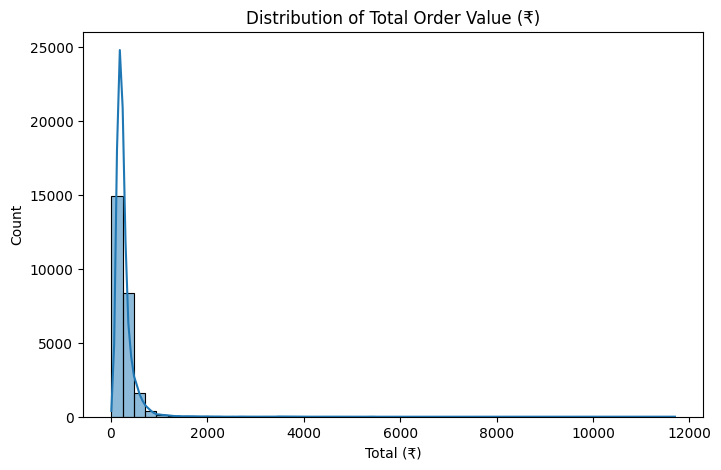

In [ ]:
# DISTRIBUTIONS
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df['Total (₹)'], bins=50, kde=True)
plt.title("Distribution of Total Order Value (₹)")
plt.show()

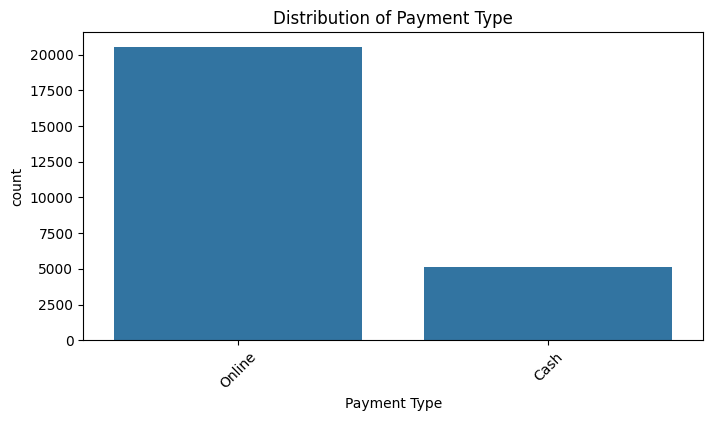

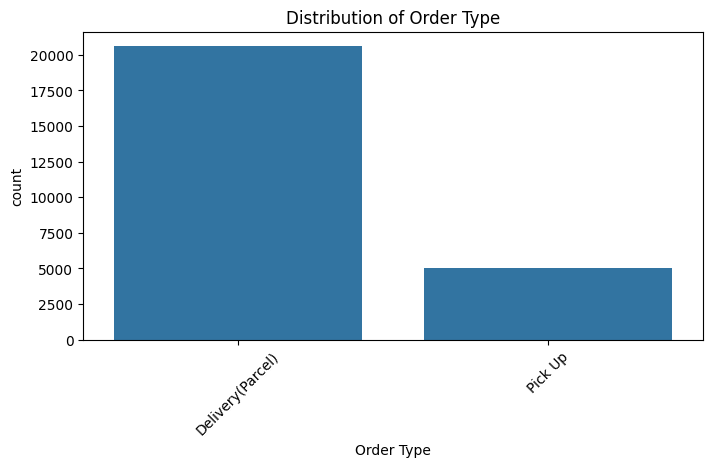

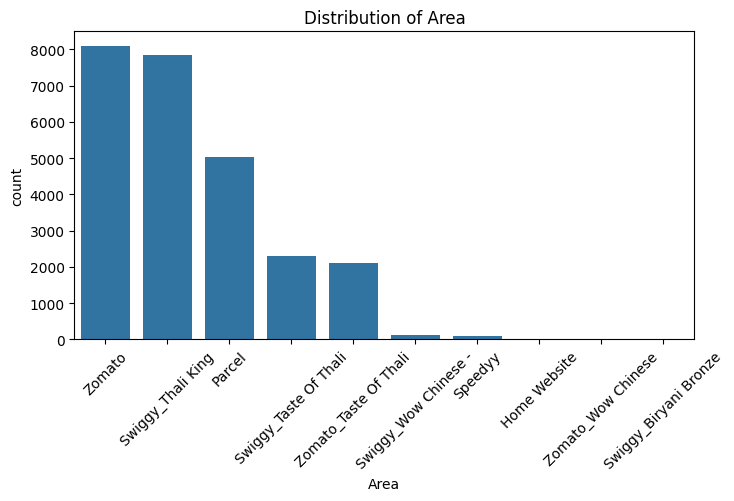

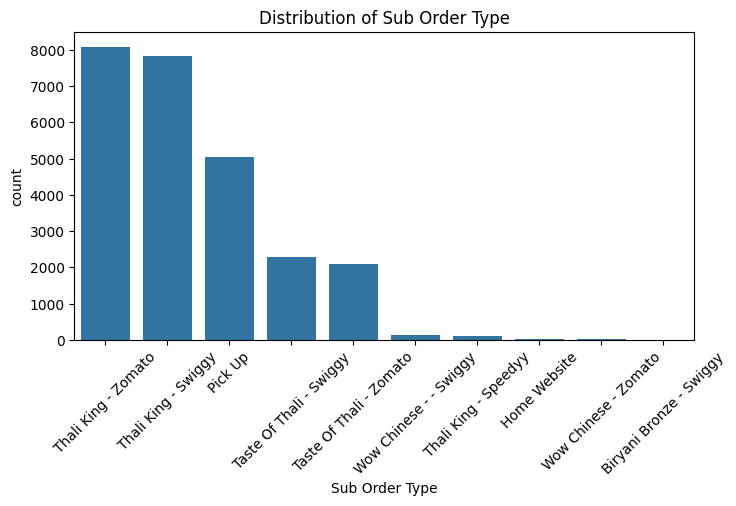

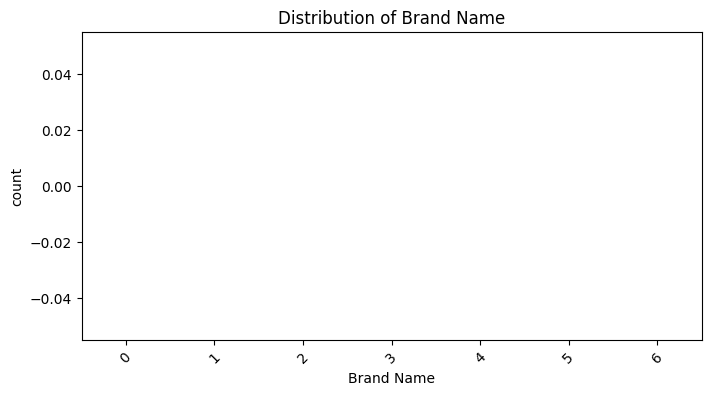

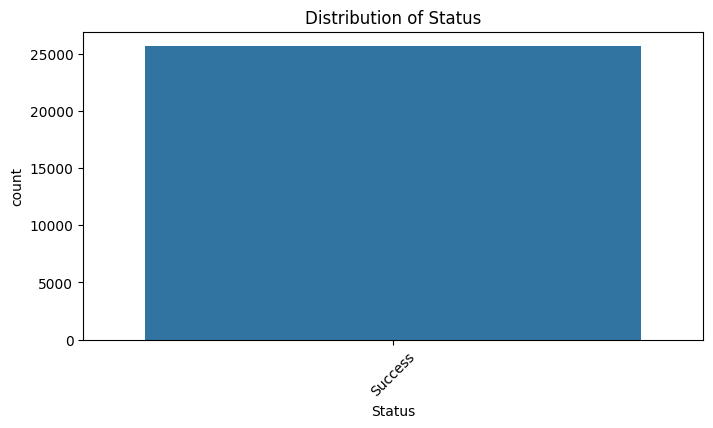

In [ ]:
# CATEGORICAL ANALYSIS
# =========================
cat_features = ['Payment Type', 'Order Type', 'Area', 'Sub Order Type', 'Brand Name', 'Status']
cat_features = [c for c in cat_features if c in df.columns]

for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

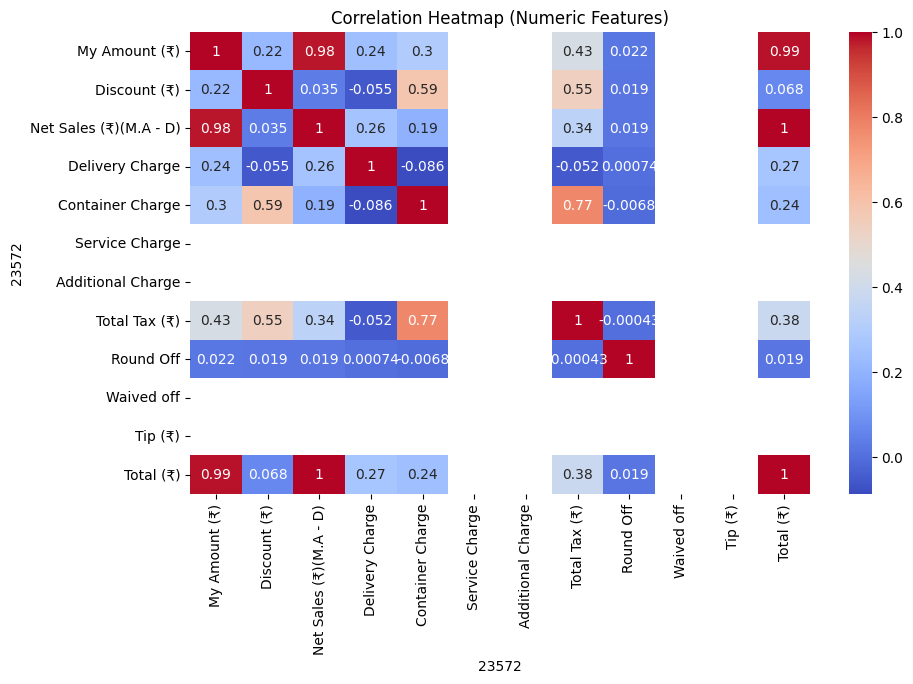

In [ ]:
# CORRELATION HEATMAP
# =========================
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

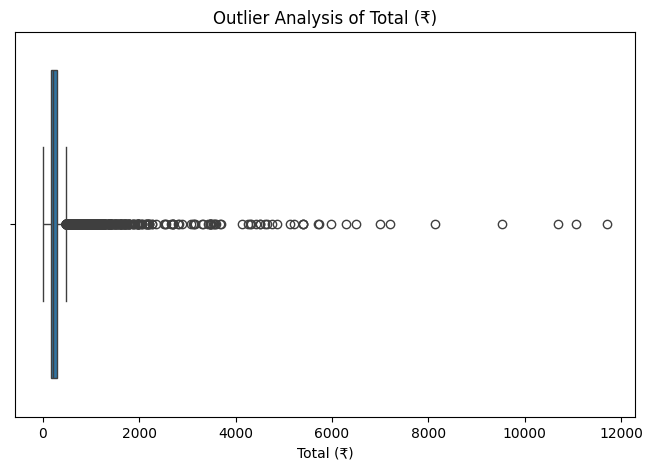

In [ ]:
# OUTLIER ANALYSIS
# =========================
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Total (₹)'])
plt.title("Outlier Analysis of Total (₹)")
plt.show()

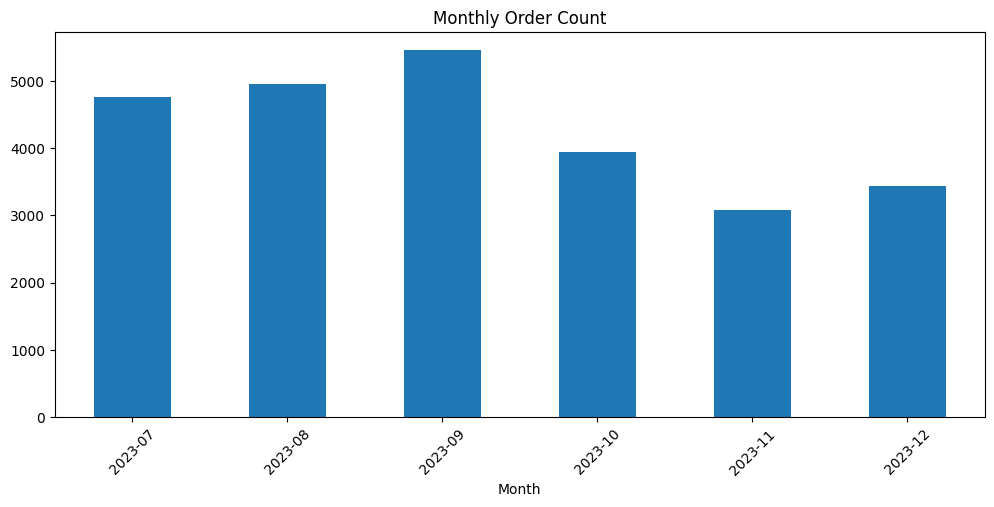

In [ ]:
# Orders over time
df['Month'] = df['Date'].dt.to_period('M')
monthly_orders = df.groupby('Month').size()

monthly_orders.plot(kind='bar', figsize=(12,5), title='Monthly Order Count')
plt.xticks(rotation=45)
plt.show()

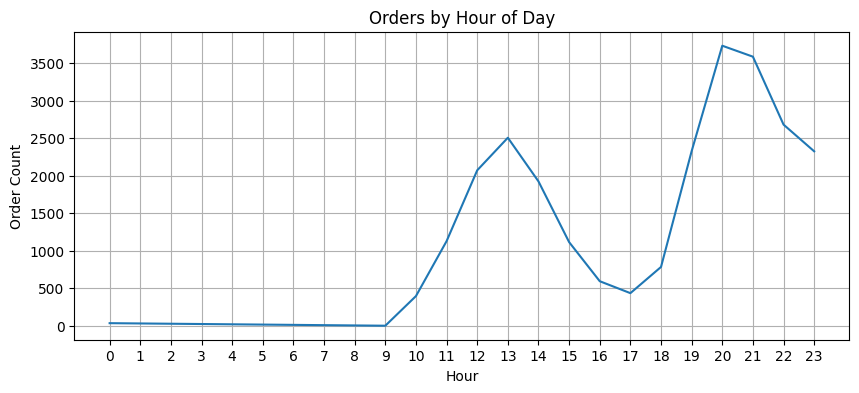

In [ ]:
#Orders by Hour of Day
df['Hour'] = pd.to_datetime(df['Date'], errors='coerce').dt.hour
hourly_orders = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.xticks(range(24))
plt.grid(True)
plt.show()

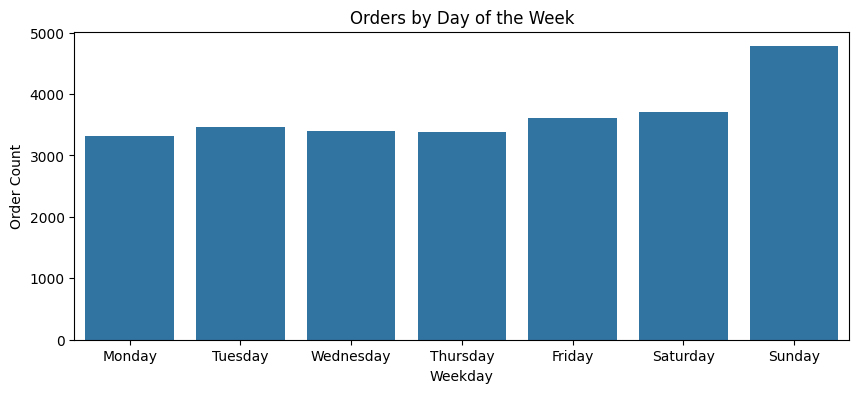

In [ ]:
#Orders by Day of Week
df['Weekday'] = pd.to_datetime(df['Date'], errors='coerce').dt.day_name()
weekday_orders = df['Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,4))
sns.barplot(x=weekday_orders.index, y=weekday_orders.values)
plt.title('Orders by Day of the Week')
plt.ylabel('Order Count')
plt.show()

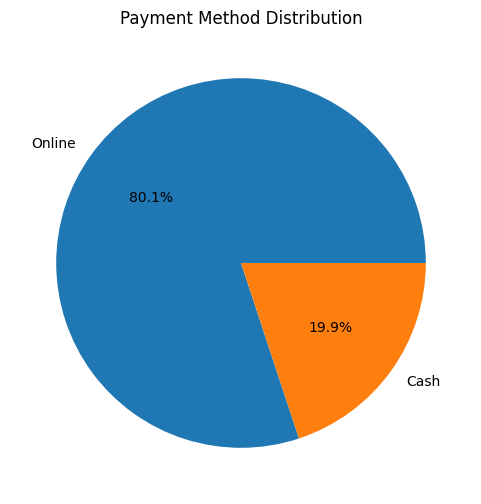

In [ ]:
#Payment Method Distribution
if 'Payment Type' in df.columns:
    df['Payment Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
    plt.title('Payment Method Distribution')
    plt.ylabel('')
    plt.show()

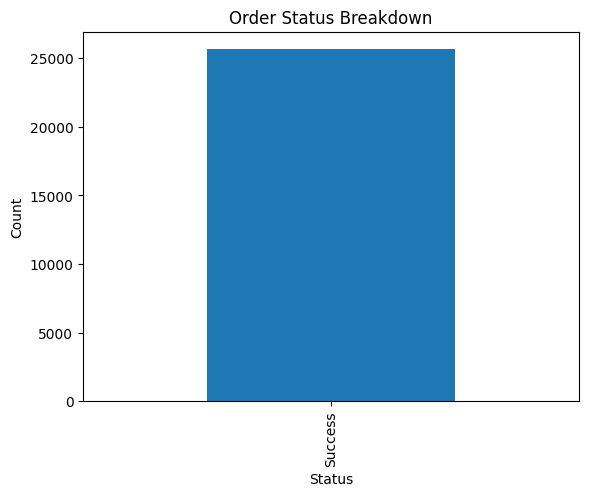

In [ ]:
# Order Status Analysis (Cancelled, Success, etc.)
if 'Status' in df.columns:
    status_counts = df['Status'].value_counts()
    status_counts.plot(kind='bar', title='Order Status Breakdown')
    plt.ylabel('Count')
    plt.show()

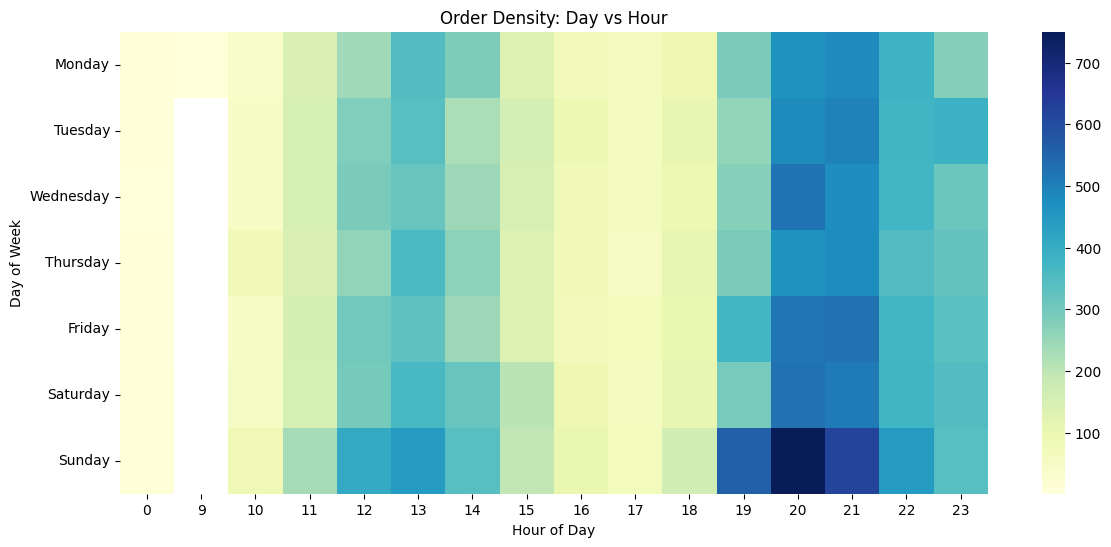

In [ ]:
#Heatmap: Orders by Day and Hour
df['Day'] = pd.to_datetime(df['Date'], errors='coerce').dt.day_name()
df['Hour'] = pd.to_datetime(df['Date'], errors='coerce').dt.hour

heatmap_data = df.groupby(['Day', 'Hour']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Order Density: Day vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [ ]:
corr_matrix = df[num_cols].corr()
strong_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]
print("Strong correlations:\n", strong_corr.dropna(how='all').dropna(axis=1, how='all'))





Strong correlations:
 23572                   My Amount (₹)  Discount (₹)  Net Sales (₹)(M.A - D)  \
23572                                                                         
My Amount (₹)                1.000000           NaN                0.982232   
Discount (₹)                      NaN           1.0                     NaN   
Net Sales (₹)(M.A - D)       0.982232           NaN                1.000000   
Delivery Charge                   NaN           NaN                     NaN   
Container Charge                  NaN           NaN                     NaN   
Total Tax (₹)                     NaN           NaN                     NaN   
Round Off                         NaN           NaN                     NaN   
Total (₹)                    0.986875           NaN                0.998461   

23572                   Delivery Charge  Container Charge  Total Tax (₹)  \
23572                                                                      
My Amount (₹)                      

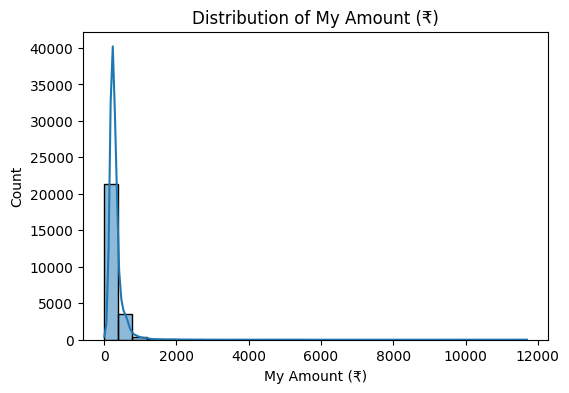

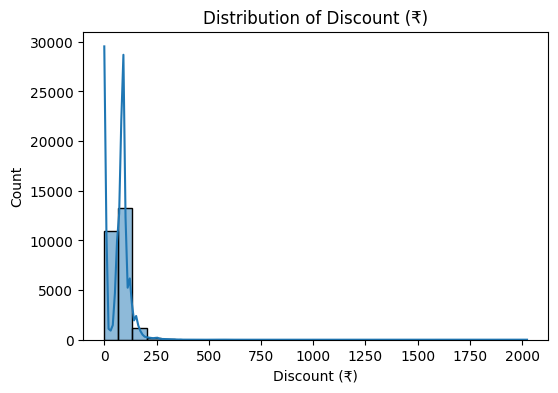

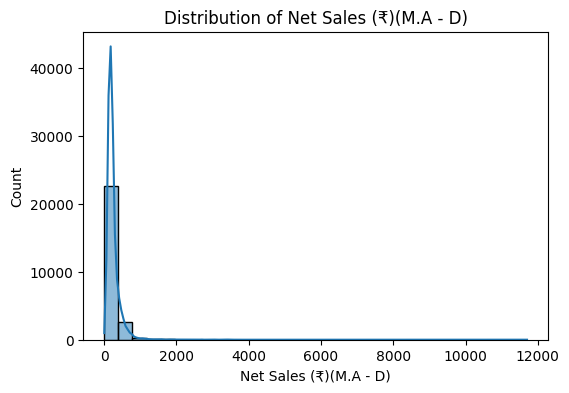

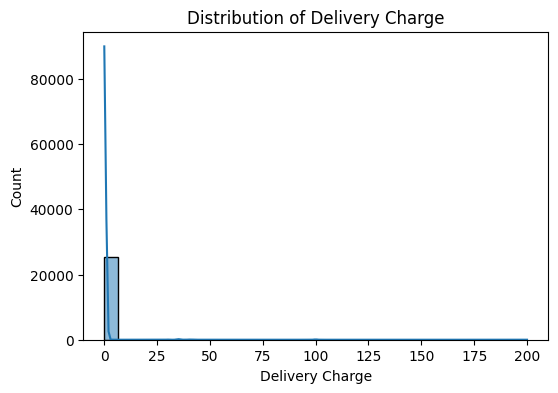

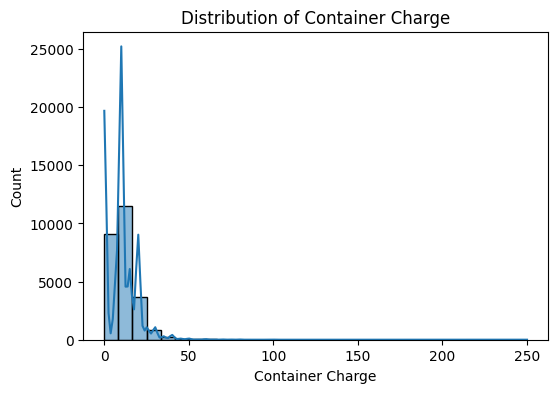

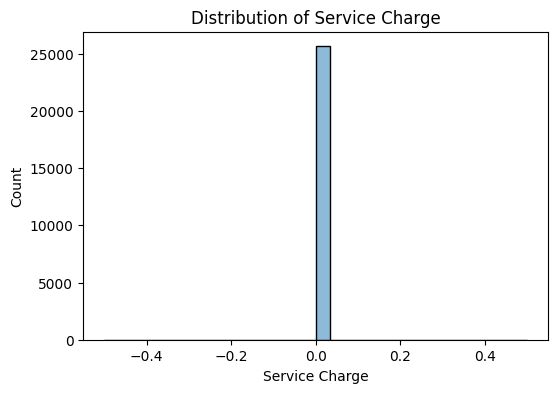

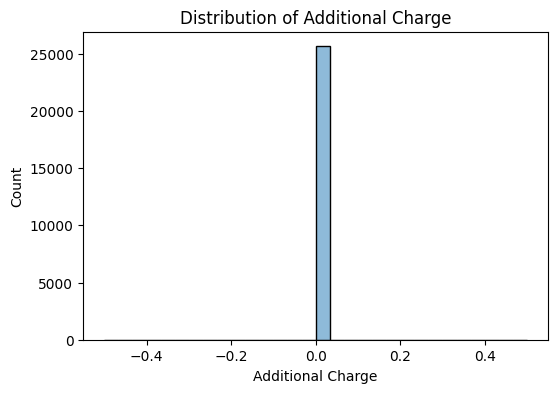

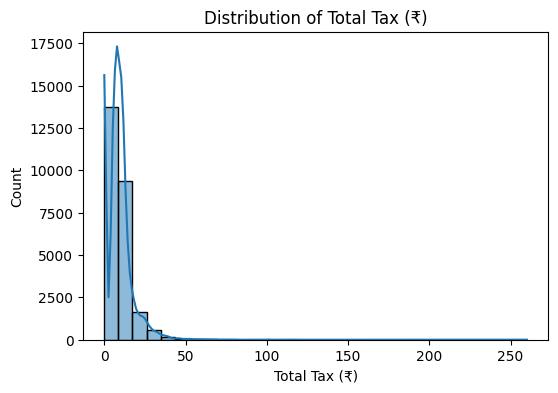

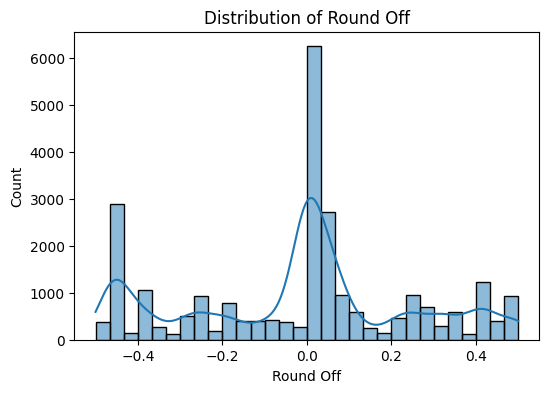

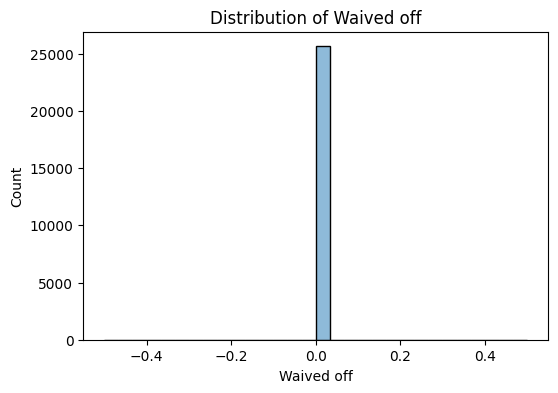

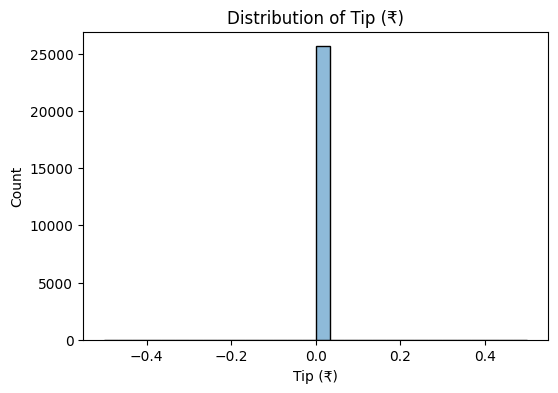

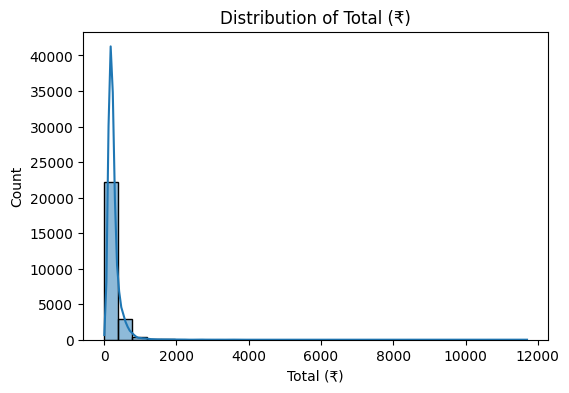

NameError: name 'cat_cols' is not defined

In [ ]:
#Univariate Analysis (single column distributions)

# Numeric distributions
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical distributions
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().nlargest(20).plot(kind='bar')
    plt.title(f"Top categories in {col}")
    plt.show()


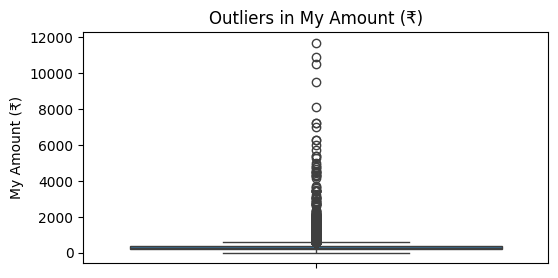

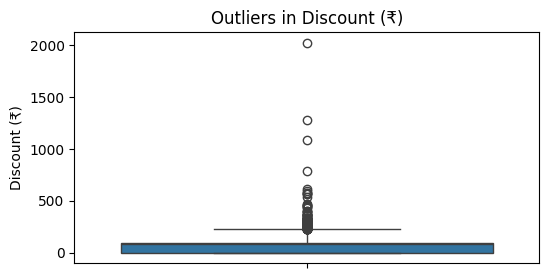

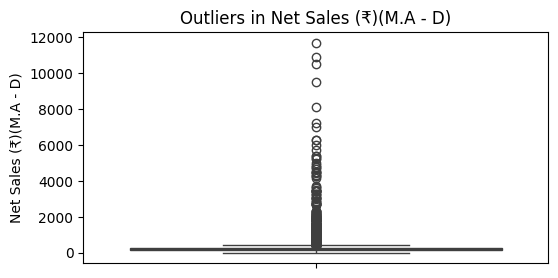

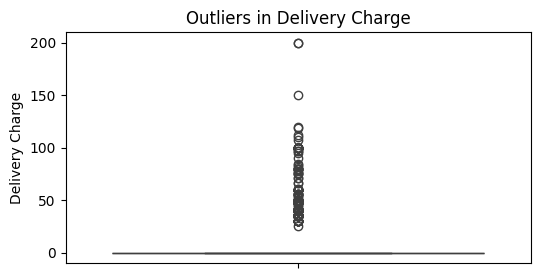

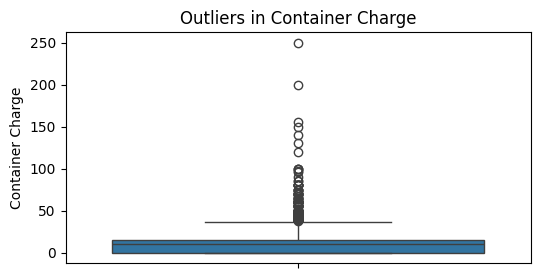

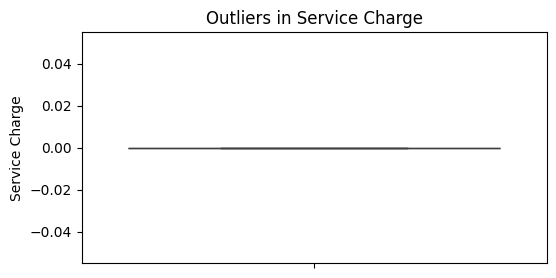

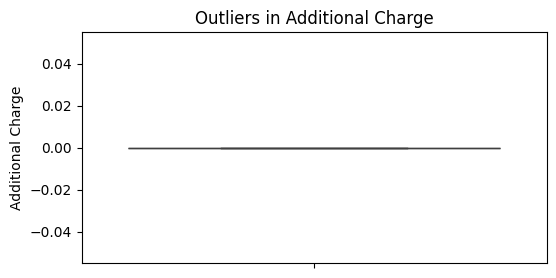

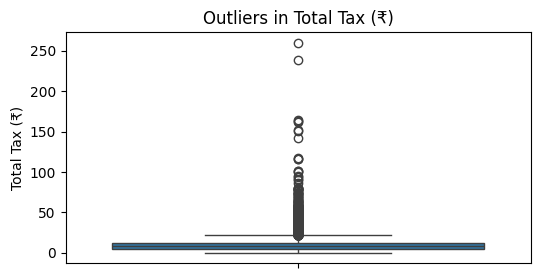

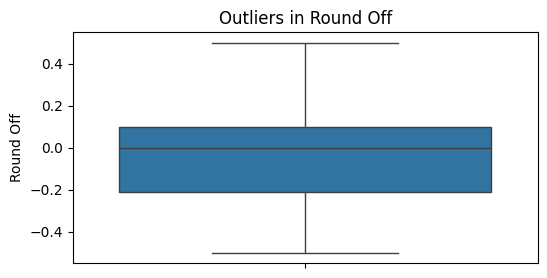

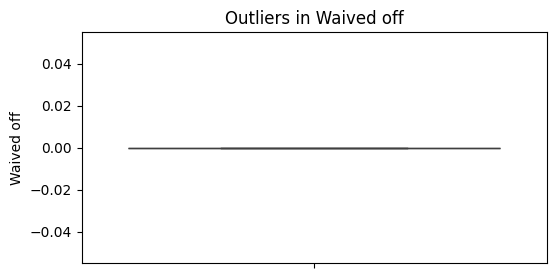

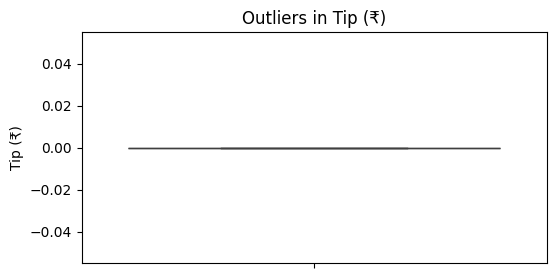

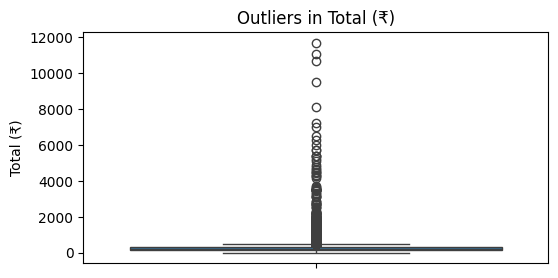

Outliers per numeric column:
 23572
My Amount (₹)             1903
Discount (₹)               199
Net Sales (₹)(M.A - D)    2263
Delivery Charge            200
Container Charge           306
Service Charge               0
Additional Charge            0
Total Tax (₹)             1517
Round Off                    0
Waived off                   0
Tip (₹)                      0
Total (₹)                 2228
dtype: int64


In [ ]:
#Outlier Detection

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# Using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per numeric column:\n", outliers)


In [ ]:
# Example aggregations
if 'Item Name' in df.columns and 'Total' in df.columns:
    revenue_per_item = df.groupby('Item Name')['Total'].sum().nlargest(10)
    sns.barplot(x=revenue_per_item.values, y=revenue_per_item.index)
    plt.title("Top 10 Revenue-Generating Items")
    plt.show()

if 'Customer Name' in df.columns and 'Total' in df.columns:
    revenue_per_customer = df.groupby('Customer Name')['Total'].sum().nlargest(10)
    sns.barplot(x=revenue_per_customer.values, y=revenue_per_customer.index)
    plt.title("Top 10 Customers by Revenue")
    plt.show()


In [ ]:
# STEP 6: Feature Engineering

# Limit categorical cardinality
def limit_card(series, top_n=20):
    top = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top else 'Other')

for c in cat_features:
    df[c] = df[c].fillna("Unknown")
    df[c] = limit_card(df[c], top_n=20)

# One-hot encode
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)


Encoded dataset shape: (25641, 71)


In [ ]:
#STEP 7: MACHINE LEARNING

# ---A. REGRESSION MODEL TEMPLATE ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# 🔹 Choose target column (numeric)
target = 'Total (₹)'  # <-- change to your column name
X = df.drop(columns=[target])
y = df[target]


In [ ]:
# 🔹 Handle missing values
X = X.fillna("Missing")

In [ ]:
# 🔹 Encode categorical columns
from sklearn.preprocessing import LabelEncoder

# --- Handle duplicate column names ---
X = X.loc[:, ~X.columns.duplicated()]

# --- Encode categorical columns safely ---
for col in X.select_dtypes(include=['object']).columns:
    # flatten values like lists or multiple entries into single strings
    X[col] = X[col].astype(str).apply(lambda v: v if isinstance(v, str) else str(v))
    try:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    except Exception as e:
        print(f" Skipping column '{col}' due to error: {e}")


In [ ]:
# 🔹 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 🔹 Scale numeric features
from sklearn.preprocessing import StandardScaler

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scale only numeric columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
# ---1. LINEAR REGRESSION ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np



In [ ]:
import pandas as pd
import numpy as np

# --- FIX DATETIME COLUMNS (Handles datetime, period, and object dates) ---
for col in X_train.columns:
    if pd.api.types.is_datetime64_any_dtype(X_train[col]) or isinstance(X_train[col].dtype, pd.PeriodDtype):
        # Convert Periods to timestamps first
        X_train[col] = X_train[col].astype('datetime64[ns]')
        X_test[col] = X_test[col].astype('datetime64[ns]')

        # Extract meaningful date features
        X_train[col + '_year'] = X_train[col].dt.year
        X_train[col + '_month'] = X_train[col].dt.month
        X_train[col + '_day'] = X_train[col].dt.day
        X_train[col + '_weekday'] = X_train[col].dt.weekday
        X_train.drop(columns=[col], inplace=True)

        X_test[col + '_year'] = X_test[col].dt.year
        X_test[col + '_month'] = X_test[col].dt.month
        X_test[col + '_day'] = X_test[col].dt.day
        X_test[col + '_weekday'] = X_test[col].dt.weekday
        X_test.drop(columns=[col], inplace=True)



In [ ]:
# --- FIT LINEAR REGRESSION ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# --- EVALUATION ---
print("Linear Regression Results")
print("R²:", round(r2_score(y_test, y_pred_lr), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_lr), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 3))

Linear Regression Results
R²: 1.0
MAE: 0.0
RMSE: 0.0


In [ ]:
# ---2. RANDOM FOREST REGRESSOR ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print("\n Random Forest Regressor Results")
print("R²:", round(r2_score(y_test, y_pred_rf), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3))


 Random Forest Regressor Results
R²: 0.983
MAE: 1.868
RMSE: 41.895


In [ ]:
# ---B. CLASSIFICATION MODEL TEMPLATE ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 🔹 Choose target column (categorical)
target = 'Status'  # <-- change to your target column
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# 🔹 Handle missing values
X = X.fillna("Missing")
y = y.fillna("Missing")


In [ ]:
# 🔹 Encode categorical columns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure unique column names first
X = X.loc[:, ~X.columns.duplicated()].copy()

# Encode only valid object columns
for col in X.select_dtypes(include=['object']).columns:
    try:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    except Exception as e:
        print(f"⚠️ Skipping column '{col}' due to error: {e}")


In [ ]:
# 🔹 Encode target if it’s categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

In [ ]:
# 🔹 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# 🔹 Scale numeric features
from sklearn.preprocessing import StandardScaler

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Select only numeric columns for scaling
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Scale numeric columns only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
# --- LOGISTIC REGRESSION ---
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd







In [ ]:

# --- FIX DATETIME & PERIOD COLUMNS ---
for df in [X_train, X_test]:
    for col in df.columns:
        # Convert Period to datetime if present
        if pd.api.types.is_period_dtype(df[col]):
            df[col] = df[col].dt.to_timestamp()

In [ ]:
  # Convert datetime columns to numeric (seconds since epoch)
       # Try converting all possible datetime columns
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        if np.issubdtype(df[col].dtype, np.datetime64):
            df[col] = df[col].astype('int64') // 10**9
    except (ValueError, TypeError):
        # Skip columns that can't be parsed as datetime
        pass

print("Datetime columns converted to numeric successfully!")

Datetime columns converted to numeric successfully!


In [ ]:
# --- Ensure all data is numeric ---
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
# --- Fill any missing values ---
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
# ---1. LOGISTIC REGRESSION MODEL ---
import numpy as np
from sklearn.linear_model import LogisticRegression

# Check classes in training set
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)

if len(unique_classes) < 2:
    print(" Error: y_train contains only one class. Cannot train Logistic Regression.")
else:
    # Fit model
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print(" Logistic Regression model trained successfully!")


Unique classes in y_train: [0]
 Error: y_train contains only one class. Cannot train Logistic Regression.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Ensure predictions are discrete (0/1)
if np.any((y_pred_lr > 0) & (y_pred_lr < 1)):
    # convert probabilities to binary classes
    y_pred_lr = (y_pred_lr >= 0.5).astype(int)


In [ ]:
# ---2.RANDOM FOREST CLASSIFIER ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:

print("\n Random Forest Classifier Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5129

    accuracy                           1.00      5129
   macro avg       1.00      1.00      1.00      5129
weighted avg       1.00      1.00      1.00      5129



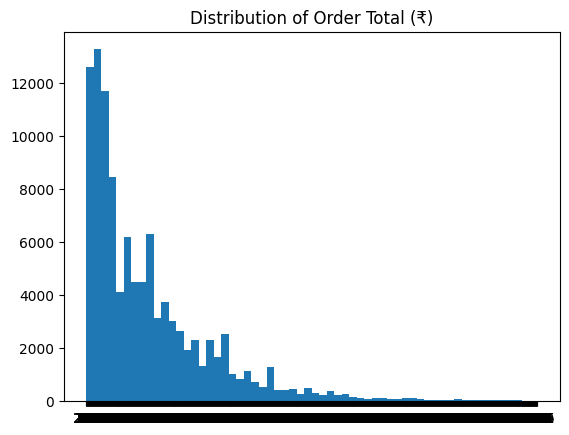

LR R2: 1.0
RF R2: 0.9997143662551984


In [ ]:
#STEP 8:Minimal reproducible Python script (EDA + baseline models)

# dependencies: pandas, numpy, scikit-learn, matplotlib
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. load
df = pd.read_csv('Merged_Orders_Report.csv', low_memory=False)

# 2. drop summary rows where Invoice No. is non-numeric (Total/Min/Max/Avg)
def is_numeric_like(x):
    try:
        float(x)
        return True
    except:
        return False
df = df[df['Invoice No.'].apply(is_numeric_like)].reset_index(drop=True)

# 3. drop unnamed empty columns (optional)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 4. coerce numeric columns
num_cols_guess = ['My Amount (₹)', 'Discount (₹)', 'Net Sales (₹)(M.A - D)', 'Delivery Charge',
                  'Container Charge', 'Service Charge', 'Additional Charge', 'Total Tax (₹)',
                  'Round Off', 'Waived off', 'Tip (₹)']
num_cols = [c for c in num_cols_guess if c in df.columns]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 5. target
target = 'Total (₹)'

# 6. quick EDA plots (example)
plt.hist(df[target].dropna(), bins=60)
plt.title('Distribution of Order Total (₹)')
plt.show()

# 7. modelling baseline (regression)
cat_features = [c for c in ['Payment Type','Order Type','Area','Sub Order Type','Brand Name','Status'] if c in df.columns]
reg_df = df[cat_features + num_cols + [target]].copy().dropna(subset=[target])
reg_df[num_cols] = reg_df[num_cols].fillna(reg_df[num_cols].median())
reg_df[cat_features] = reg_df[cat_features].fillna('Unknown')

# limit cardinality
def limit_card(series, top_n=20):
    top = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top else 'Other')
for c in cat_features:
    reg_df[c] = limit_card(reg_df[c], top_n=20)

# one-hot encode
reg_encoded = pd.get_dummies(reg_df, columns=cat_features, drop_first=True)
X = reg_encoded.drop(columns=[target])
y = reg_encoded[target]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('LR R2:', r2_score(y_test, y_pred_lr))

rf = RandomForestRegressor(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('RF R2:', r2_score(y_test, y_pred_rf))


In [ ]:
#STEP 9:Downloading cleaned Data File

import os
os.makedirs("cleaned_data", exist_ok=True)


In [ ]:
import os

# Create folder if not exists
os.makedirs("cleaned_data", exist_ok=True)

# Export cleaned data sample
output_path = "cleaned_data/cleaned_orders_sample.csv"
sample = df.sample(n=min(5000, len(df)), random_state=42)
sample.to_csv(output_path, index=False)

print(" Saved cleaned sample for Power BI:", os.path.abspath(output_path))


 Saved cleaned sample for Power BI: /content/cleaned_data/cleaned_orders_sample.csv


In [ ]:
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_path = "cleaned_data/cleaned_orders_sample.csv"
sample = df.sample(n=min(5000, len(df)), random_state=42)
sample.to_csv(output_path, index=False)
print(" Saved cleaned sample for Power BI:", output_path)


 Saved cleaned sample for Power BI: cleaned_data/cleaned_orders_sample.csv
